In [2]:
import yaml, json
from glob import glob

In [95]:
postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/covid/'

In [80]:
# addresses for lungs
addr_scratch = prefix+'lungs_scratch_2021-11-22_18-11-33/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_scratch,attempts=*' + postfix
addr_sorting = prefix+'lungs_sorting_2021-11-*/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting,attempts=*' + postfix
addr_simclr = prefix+'lungs_simclr_2021-11-23_23-03-48/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_simclr,attempts=*' + postfix
addr_sorting_1GPU = prefix+'lungs_sorting_1GPU_2021-11-26_12-03-41/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting_1GPU,attempts=*' + postfix
addr_sorting_2GPU = prefix+'lungs_sorting_2GPU_2021-11-26_15-09-37/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting_2GPU,attempts=*' + postfix
addr_sorting_nonorm = prefix+'lungs_sorting_nonorm_2021-11-27_14-48-31/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_nonorm_harder = prefix+'lungs_sorting_nonorm_harder_2021-11-30_15-20-10/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix

In [81]:
addresses = {
    'simclr': addr_simclr,
#     'simclr-inside': addr_simclr2,
    'none': addr_scratch, 
#     'sorting': addr_sorting,
#     'sorting-1GPU': addr_sorting_1GPU,
    'sorting-2GPU': addr_sorting_2GPU,
#     'addr_sorting_nonorm': addr_sorting_nonorm,
    'addr_sorting_nonorm_harder': addr_sorting_nonorm_harder
}

In [82]:
all_partitions = ['1.0', '0.1', '0.01', '0.005']

In [3]:
postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/covid/'

In [10]:
# addresses for covid
addr_scratch = prefix+'covid_scratch_2021-11-24_10-29-59/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=covid_randomized_pfpn_scratch,attempts=*' + postfix
addr_sorting = prefix+'covid_sorting_2021-11-24_10-55-00/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=covid_randomized_pfpn_sorting,attempts=*' + postfix
addr_simclr = prefix+'covid_simclr_2021-11-24_11-00-34/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=covid_randomized_pfpn_simclr,attempts=*' + postfix
addr_simclr_harder = prefix+'covid_simclr_harder_2021-12-06_09-46-40/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_nonorm = prefix+'covid_sorting_nonorm_2021-11-29_10-03-34/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_2GPU = prefix+'covid_sorting_2GPU_2021-11-29_11-19-58/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_nonorm_harder = prefix+'covid_sorting_nonorm_harder_2021-11-30_11-14-08/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix

In [11]:
addresses = {
    'simclr': addr_simclr,
    'simclr_harder': addr_simclr_harder,
#     'simclr-inside': addr_simclr2,
    'none': addr_scratch, 
#     'sorting': addr_sorting,
#     'addr_sorting_nonorm': addr_sorting_nonorm,
    'addr_sorting_2GPU': addr_sorting_2GPU,
    'addr_sorting_nonorm_harder': addr_sorting_nonorm_harder
}

In [6]:
all_partitions = ['1.0', '0.1']

In [120]:
postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/medaka-supervised/'

In [121]:
addr_simclr = prefix+'simclr_2021-11-08_13-20-33/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_simclr,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix
addr_scratch = prefix+'scratch_2021-11-09_10-07-05/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_scratch,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix
addr_sorting = prefix+'sorting_2021-11-10_08-34-26/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_sorting,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix
addr_simclr2 = prefix+'simclr2_2021-11-11_08-39-12/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_simclr2,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix
addr_sorting_u = prefix+'sorting_u_2021-11-12_10-19-53/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_sorting_u,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix

In [122]:
addresses = {
    'simclr': addr_simclr,
    'simclr-inside': addr_simclr2,
#     'none': addr_scratch, 
    'sorting': addr_sorting,
#     'sorting-noncropped': addr_sorting_u
}

In [123]:
all_partitions = ['1.0', '0.1', '0.01']

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [8]:
def get_best_value_v1(metric_data):
    return metric_data['best']['mean-iou']

def get_best_value_v2(metric_data):
    epochs = [k for k in metric_data.keys() if k.startswith('epoch_')]
    metrics = [metric_data[k][2]['mean-iou'] for k in epochs]
    return np.max(metrics)

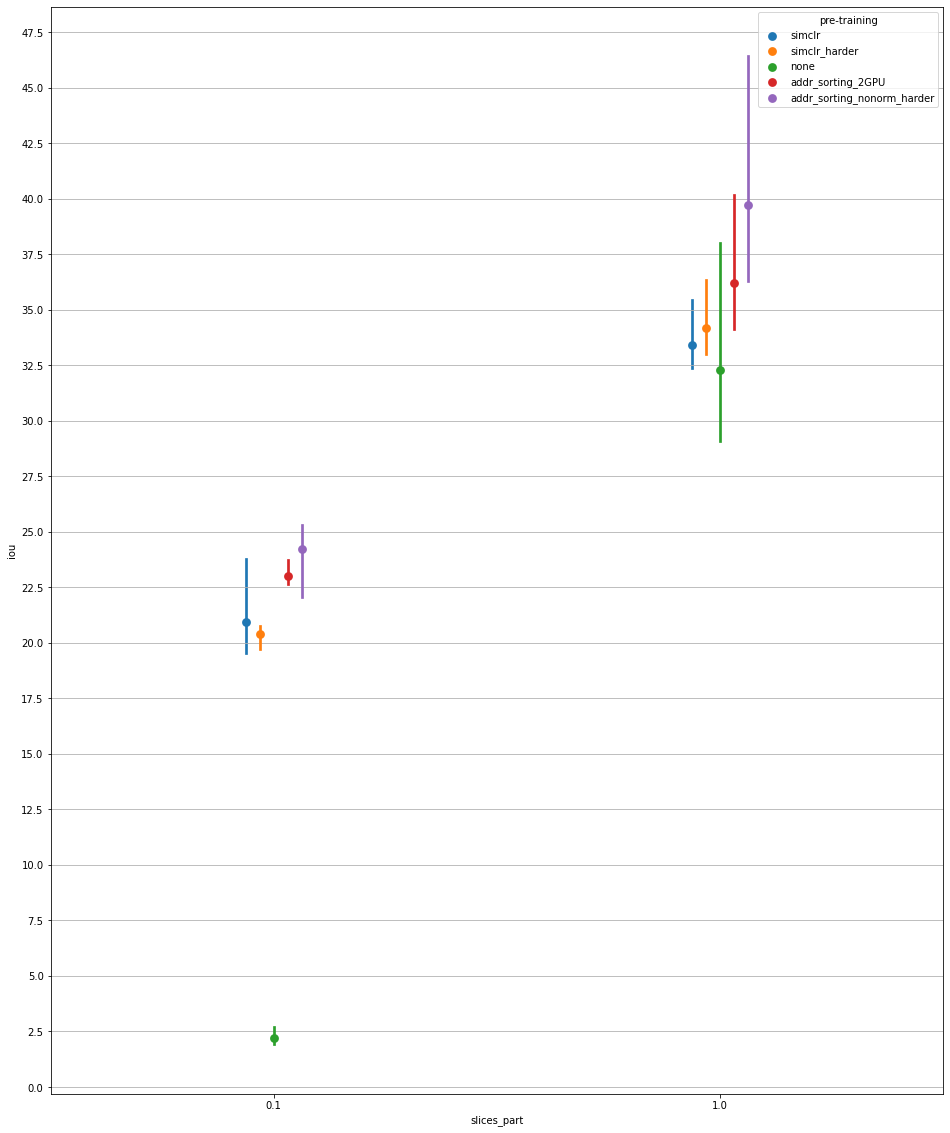

In [47]:
all_runs = []
for name, address in addresses.items():
    for slc_partition in all_partitions:
        all_metrics = glob(address.format(part=slc_partition))
        for metric in all_metrics:
            with open(metric) as f:
                metric_data = json.load(f)
            current_measure = {'pre-training': name, 
                               'slices_part': float(slc_partition), 
                               'iou': get_best_value_v2(metric_data)}
            all_runs.append(current_measure)

all_runs = pd.DataFrame(all_runs)

plt.figure(figsize=(16, 20))
sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', dodge=True, join=False, ci=100)
loc = plticker.MultipleLocator(base=2.5) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()

In [44]:
mean_runs = all_runs.groupby(['pre-training', 'slices_part'])
mean_runs = mean_runs.apply(lambda x: f'${x.iou.mean():.1f} \pm {x.iou.std():.1f}$') #  \pm {x.iou.std():.1f}
mean_runs = mean_runs.unstack(1)

mean_runs

slices_part,0.1,1.0
pre-training,,
addr_sorting_2GPU,$23.0 \pm 0.6$,$36.2 \pm 3.4$
addr_sorting_nonorm_harder,$24.2 \pm 1.9$,$39.7 \pm 5.8$
none,$2.2 \pm 0.4$,$32.3 \pm 5.0$
simclr,$21.0 \pm 2.4$,$33.4 \pm 1.8$
simclr_harder,$20.2 \pm 0.7$,$34.1 \pm 1.9$


In [48]:
print(mean_runs.to_markdown())

| pre-training               | 0.1            | 1.0            |
|:---------------------------|:---------------|:---------------|
| addr_sorting_2GPU          | $23.0 \pm 0.6$ | $36.2 \pm 3.4$ |
| addr_sorting_nonorm_harder | $24.2 \pm 1.9$ | $39.7 \pm 5.8$ |
| none                       | $2.2 \pm 0.4$  | $32.3 \pm 5.0$ |
| simclr                     | $21.0 \pm 2.4$ | $33.4 \pm 1.8$ |
| simclr_harder              | $20.2 \pm 0.7$ | $34.1 \pm 1.9$ |


In [38]:
all_runs.groupby(['pre-training', 'slices_part']).std().unstack(1)

iou                              
slices_part                    0.005     0.010     0.100     1.000
pre-training                                                      
addr_sorting_nonorm_harder  0.001651  0.001480  0.214605  0.179377
none                        0.641584  0.096613  0.090805  0.098636
simclr                      0.002014  0.006860  0.180273  0.112407
sorting-2GPU                0.003933  0.224379  0.576112  0.187306

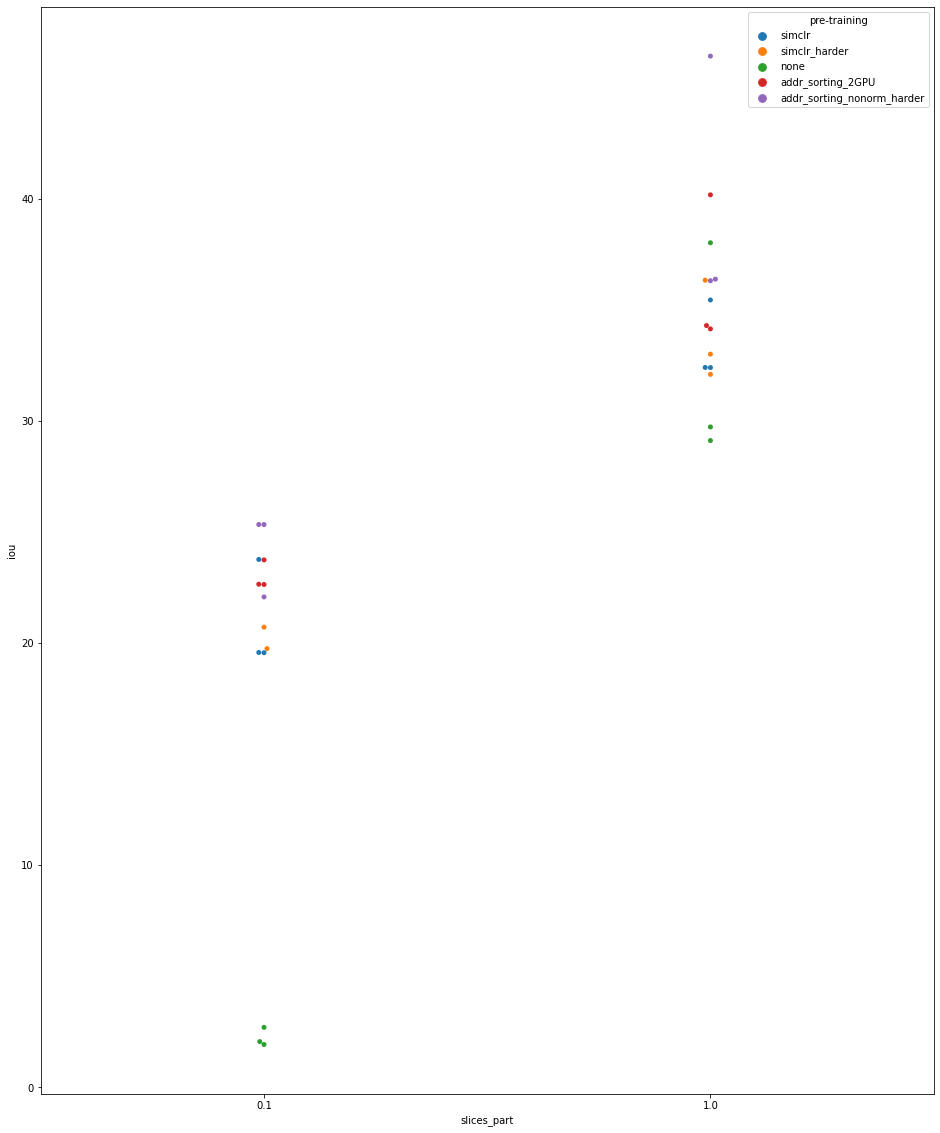

In [39]:
plt.figure(figsize=(16, 20))
# sns.boxplot(x="slices_part", y="iou", hue="pre-training", data=all_runs, width=0.1)
sns.swarmplot(x="slices_part", y="iou", hue="pre-training", data=all_runs)
# sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', ci=None, scale=0.3, marker='D')
# sns.violinplot(x="slices_part", y="iou", hue="pre-training", data=pd.DataFrame(all_runs))
plt.show()

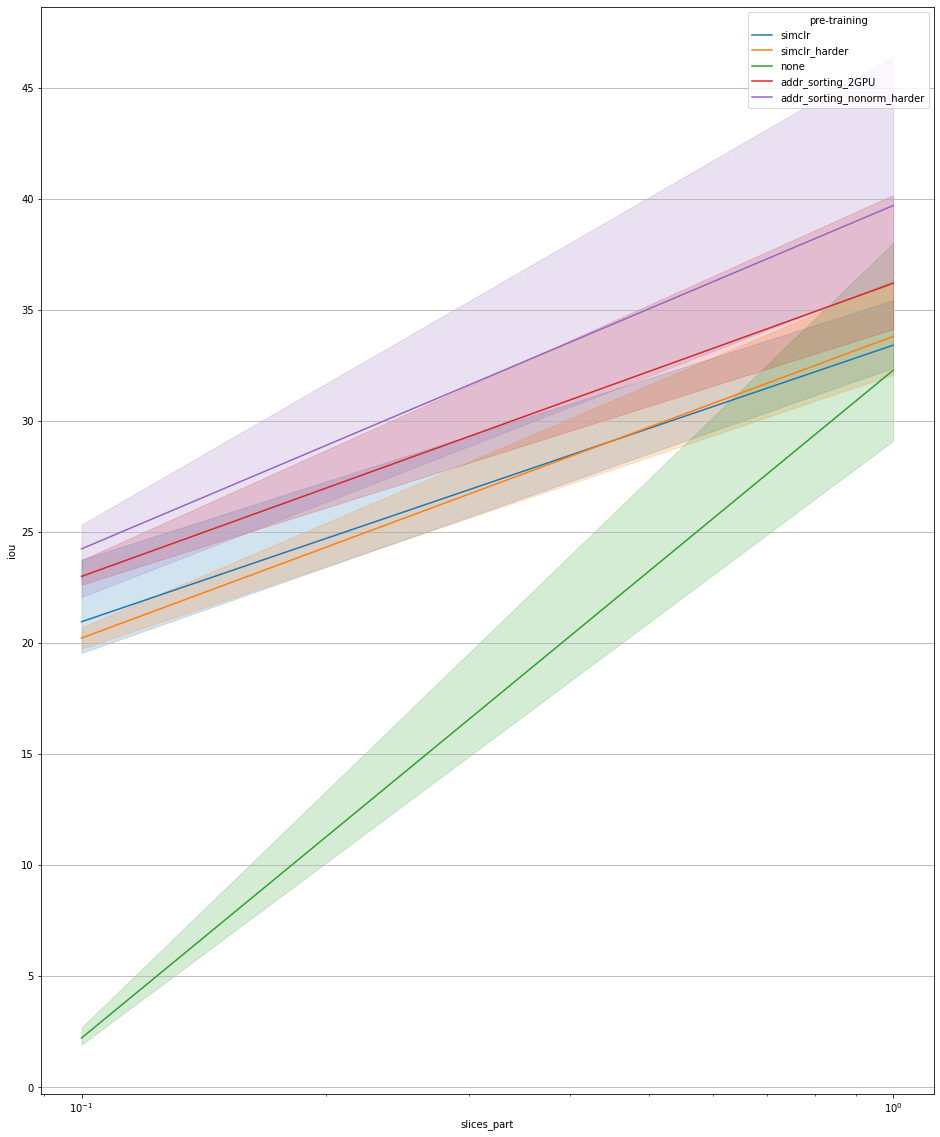

In [38]:
plt.figure(figsize=(16, 20))
grid = sns.lineplot(data=all_runs, x='slices_part', y='iou', hue='pre-training')
grid.set(xscale="log")
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()